In [ ]:
import pandas as pd
import numpy as np
#Método de clasificación KNN (vecino más cercano)
from sklearn.neighbors import KNeighborsClassifier
#Método de clasifiación DecisionTree (árbol de decision)
from sklearn.tree import DecisionTreeClassifier
#Uso de gráficas y representación de datos
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.io import arff


In [ ]:
#Lectura de Dataset haciendo uso de URL de github y el nombre de las columnas
def readDataset(file,columns):
  dataset=pd.read_csv(file, header=None, names=columns)
  return dataset

In [ ]:
def accuracyGraphic(datasets, first_accuracy, second_accuracy, first_model, second_model):
  plt.plot(datasets, first_accuracy, label=first_model+'_accuracy')
  plt.plot(datasets, second_accuracy, label=second_model+'_accuracy')
  plt.xlabel('Datasets')
  plt.ylabel('Accuracy')
  plt.title(first_model+'vs'+second_model)
  plt.legend()
  plt.show()

###**1. Seleccione al menos tres conjuntos de datos de 2 classes. Es preferible conjuntos pequeños con variables nominales.**###

In [ ]:
#Diabetes Data Set
columnas=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age','Class']
diabetes_features=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age']
diabetes=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/diabetes.data',columnas)
diabetes_X=diabetes[diabetes_features]
diabetes_y=diabetes['Class']
diabetes.head()

,Times Pregnant,Glucose tolerance,Blood pressure,Triceps skin fold,Insulin,Body mass,Diabetes pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
#Vote Data set
columnas = ['handicapped-infants','water cost sharing', 'adoption the budget resolution', 'physician fee freezen', 'god aid','religous groups','anti satellite test','aid to nicaraguan contras','mx-misil','inmigration','recortes','gasto de educacion','demandas','crimen','exportacion libre impuestos','adminitracion sur africa', 'class']
vote_features = ['handicapped-infants','water cost sharing', 'adoption the budget resolution', 'physician fee freezen', 'god aid','religous groups','anti satellite test','aid to nicaraguan contras','mx-misil','inmigration','recortes','gasto de educacion','demandas','crimen','exportacion libre impuestos','adminitracion sur africa']
vote = readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/vote.data',columnas)
vote = vote.replace({'y':0, 'n':1, '?':2})
vote_X = vote[vote_features]
vote_y = vote['class']
vote.head()

,handicapped-infants,water cost sharing,adoption the budget resolution,physician fee freezen,god aid,religous groups,anti satellite test,aid to nicaraguan contras,mx-misil,inmigration,recortes,gasto de educacion,demandas,crimen,exportacion libre impuestos,adminitracion sur africa,class
0,1,0,1,0,0,0,1,1,1,0,2,0,0,0,1,0,republican
1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,2,republican
2,2,0,0,2,0,0,1,1,1,1,0,1,0,0,1,1,democrat
3,1,0,0,1,2,0,1,1,1,1,0,1,0,1,1,0,democrat
4,0,0,0,1,0,0,1,1,1,1,0,2,0,0,0,0,democrat


In [ ]:
#Titanic Data set
titanic = pd.read_csv('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/titanic.csv')
titanic=titanic.dropna()
titanic = titanic.replace({'male':0, 'female':1})
titanic['Survived'] = titanic['Survived'].replace({0:'NoSurvived',1:'Survived'})
titanic_X=titanic.drop(['Survived'],axis=1)
titanic_y=titanic['Survived']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,NoSurvived,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,Survived,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,Survived,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


###**2. Para cada uno de estos conjuntos aplique el método RIPPER del módulo “wittgenstein” (ejemplo en ripper.py). Evalúe los modelos obtenidos y compárelos con un árbol de decisión. Trate de interpretar los modelos obtenidos.**###

In [ ]:
!pip install wittgenstein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn import datasets
import wittgenstein as lw
from sklearn.model_selection import train_test_split

In [ ]:
train_diabetes, test_diabetes = train_test_split(diabetes, test_size=.33)

In [ ]:
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(diabetes, class_feat="Class", pos_class='tested_positive')

# Print model
print(ripper_clf.out_model())

# Score
X_test_diabetes = test_diabetes.drop('Class', axis=1)
y_test_diabetes = test_diabetes['Class']
print(ripper_clf.score(X_test_diabetes, y_test_diabetes))

[[Glucosetolerance=>167.0 ^ TimesPregnant=<1.0 ^ Insulin=<30.5] V
[Glucosetolerance=>167.0] V
[Age=42.6-51.0 ^ Insulin=>210.0] V
[Age=42.6-51.0 ^ Insulin=106.0-150.0 ^ TimesPregnant=>9.0] V
[Glucosetolerance=147.0-167.0 ^ Bodymass=30.1-32.0] V
[Bodymass=>41.5 ^ Insulin=<30.5] V
[Glucosetolerance=134.0-147.0 ^ Diabetespedigree=0.45-0.56] V
[Age=42.6-51.0 ^ Bloodpressure=74.0-78.0] V
[Diabetespedigree=>0.88 ^ Insulin=150.0-210.0] V
[TimesPregnant=7.0-9.0 ^ Bodymass=28.2-30.1] V
[Glucosetolerance=134.0-147.0 ^ TimesPregnant=7.0-9.0]]
None
0.7874015748031497


In [ ]:
train_vote, test_vote= train_test_split(vote, test_size=.33)

In [ ]:
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(vote, class_feat="class", pos_class='democrat')

# Print model
print(ripper_clf.out_model())

# Score
X_test_vote = test_vote.drop('class',axis=1)
y_test_vote = test_vote['class']
print(ripper_clf.score(X_test_vote, y_test_vote))

[[physicianfeefreezen=1] V
[recortes=0 ^ adoptionthebudgetresolution=0 ^ watercostsharing=0] V
[gastodeeducacion=1 ^ physicianfeefreezen=2] V
[mx-misil=0 ^ adminitracionsurafrica=2] V
[recortes=0 ^ demandas=1 ^ watercostsharing=0]]
None
0.9375


In [ ]:
train_titanic, test_titanic = train_test_split(titanic, test_size=.33)

In [ ]:
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(titanic, class_feat="Survived", pos_class='Survived')

# Print model
print(ripper_clf.out_model())

# Score
X_test_titanic = test_titanic.drop('Survived',axis=1)
y_test_titanic = test_titanic['Survived']
print(ripper_clf.score(X_test_titanic, y_test_titanic))

[[Sex=1] V
[Age=<17.2]]
None
0.6721311475409836


Este código está creando un modelo de clasificación utilizando el algoritmo RIPPER (Repeated Incremental Pruning to Produce Error Reduction) y entrenándolo con los datos del conjunto de datos titanic. La columna "Survived" se establece como la característica de clase y la clase positiva es "survived". Luego se imprime el modelo entrenado y se calcula la precisión del modelo utilizando los datos de prueba.

Este es el resultado esperado. La salida del método "out_model()" es una representación en forma de reglas del modelo entrenado. El modelo está haciendo una predicción basada en dos características: "Sex" y "Age".
En cuanto al None, es probable que sea debido a que el método out_model() no devuelve ningún valor, sólo imprime la salida.
Por último, el número 0.7704918032786885 es el puntaje de precisión del modelo en el conjunto de pruebas. Este puntaje indica que el modelo es capaz de predecir correctamente el 77% de las veces.





###**3. Seleccione al menos 10 conjuntos de datos. Genere un clasificador SVM con un kernel lineal y un valor fijo de C=1. Compare el rendimiento con un árbol de decisión**###

In [ ]:
#Método de clasifiación DecisionTree (árbol de decision)
from sklearn.tree import DecisionTreeClassifier
#Método de clasificación SVM (Máquina de vector soporte)
from sklearn.svm import SVC
#Métrica para medir los métodos de clasifiacion
from sklearn import metrics

In [ ]:
#Modelos a utilizar en esta práctica
tree=DecisionTreeClassifier()
svm=SVC(kernel='linear', C=1)

In [ ]:
#Compute accuracy of model
def accuracyDataset(features, label, model): 
  accuracy=0
  #Split into random train and test subsets
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
  #Entrenamiento de datos de entrenamiento
  model.fit(X_train,y_train)
  #Predice salidas de los datos test
  y_pred = model.predict(X_test)
  #Calcula precisión del modelo
  accuracy = metrics.accuracy_score(y_test, y_pred)
  return accuracy

In [ ]:
def cross_val (metod, data_X, data_y):
  scores_tree_acc=cross_val_score(metod, data_X, data_y, cv=10, scoring='accuracy')
  print("Mean score: ", scores_tree_acc.mean())
  return scores_tree_acc

In [ ]:
tree_score = []
svm_score = []
svm_cross = []

In [ ]:
#Iris Data set
columnas=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']
iris_features=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris= readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/iris.data', columnas)
iris_X= iris[iris_features]
iris_y= iris['class']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
iris_tree=accuracyDataset(iris_X,iris_y, tree)
tree_score.append(iris_tree)
tree_score

[0.9666666666666667]

In [ ]:
iris_svm=accuracyDataset(iris_X,iris_y, svm)
iris_svm
svm_score.append(iris_svm)
svm_score

[1.0]

In [ ]:
svm_cross_iris = cross_val(svm, iris_X, iris_y).mean()
svm_cross.append(svm_cross_iris)
svm_cross

Mean score:  0.9733333333333334


[0.9733333333333334]

In [ ]:
#Car Evaluation Data set
columnas=['buying','maint','doors', 'persons', 'lug_boot','safety','class']
car_features=['buying','maint','doors', 'persons', 'lug_boot','safety']
car= readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/car.data',columnas)
car['buying']=car['buying'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
car['maint']=car['maint'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
car['lug_boot']=car['lug_boot'].map({'small':1, 'med':2, 'big':3})
car['safety']=car['safety'].map({'low':1, 'med':2, 'high':3})
car['doors']=car['doors'].map({'1':1, '2':2,'3':3,'4':4,'5more':7}) #Esto hará que 7 signifique más de 5 puertas o personas
car['persons']=car['persons'].map({'1':1, '2':2,'3':3,'4':4,'more':7})
car_X=car[car_features]
car_y=car['class']
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [ ]:
car_tree=accuracyDataset(car_X,car_y, tree)
car_tree
tree_score.append(car_tree)
tree_score

[0.9666666666666667, 0.976878612716763]

In [ ]:
car_svm = accuracyDataset(car_X,car_y, svm)
car_svm
svm_score.append(car_svm)
svm_score

[1.0, 0.8323699421965318]

In [ ]:
svm_cross_car = cross_val(svm, car_X, car_y).mean()
svm_cross.append(svm_cross_car)
svm_cross

Mean score:  0.7747210646592284


[0.9733333333333334, 0.7747210646592284]

In [ ]:
#Wine Data Set
columnas= ['class','alcohol', 'malic acid', 'ash', 'alcalinityOfAsh', 'Magnesium',' Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280',' Proline'] 
wine_features=['alcohol', 'malic acid', 'ash', 'alcalinityOfAsh', 'Magnesium',' Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280',' Proline'] 
wine=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/wine.data',columnas)
wine_X=wine[wine_features]
wine_y=wine['class']
wine.head()

,class,alcohol,malic acid,ash,alcalinityOfAsh,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
wine_tree=accuracyDataset(wine_X,wine_y,tree)
wine_tree
tree_score.append(wine_tree)
tree_score

[0.9666666666666667, 0.976878612716763, 0.9166666666666666]

In [ ]:
wine_svm=accuracyDataset(wine_X,wine_y, svm)
wine_svm
svm_score.append(wine_svm)
svm_score

[1.0, 0.8323699421965318, 0.9444444444444444]

In [ ]:
svm_cross_wine= cross_val(svm, wine_X, wine_y).mean()
svm_cross.append(svm_cross_wine)
svm_cross

Mean score:  0.9555555555555555


[0.9733333333333334, 0.7747210646592284, 0.9555555555555555]

In [ ]:
#Diabetes Data Set
columnas=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age','Class']
diabetes_features=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age']
diabetes=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/diabetes.data',columnas)
diabetes_X=diabetes[diabetes_features]
diabetes_y=diabetes['Class']
diabetes.head()


,Times Pregnant,Glucose tolerance,Blood pressure,Triceps skin fold,Insulin,Body mass,Diabetes pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
diabetes_tree=accuracyDataset(diabetes_X, diabetes_y, tree)
diabetes_tree
tree_score.append(diabetes_tree)
tree_score

[0.9666666666666667, 0.976878612716763, 0.9166666666666666, 0.6753246753246753]

In [ ]:
diabetes_svm=accuracyDataset(diabetes_X,diabetes_y, svm)
diabetes_svm
svm_score.append(diabetes_svm)
svm_score

[1.0, 0.8323699421965318, 0.9444444444444444, 0.7792207792207793]

In [ ]:
svm_cross_diabetes= cross_val(svm, diabetes_X, diabetes_y).mean()
svm_cross.append(svm_cross_diabetes)
svm_cross

Mean score:  0.7669685577580314


[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314]

In [ ]:
#Glass Data set
columnas=['RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'Type']
glass_features=['RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe']
glass=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/glass.data',columnas)
glass_X=glass[glass_features]
glass_y=glass['Type']
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [ ]:
glass_tree=accuracyDataset(glass_X,glass_y,tree)
glass_tree
tree_score.append(glass_tree)
tree_score

[0.9666666666666667,
 0.976878612716763,
 0.9166666666666666,
 0.6753246753246753,
 0.6046511627906976]

In [ ]:
glass_svm=accuracyDataset(glass_X,glass_y,svm)
glass_svm
svm_score.append(glass_svm)
svm_score

[1.0,
 0.8323699421965318,
 0.9444444444444444,
 0.7792207792207793,
 0.5813953488372093]

In [ ]:
svm_cross_glass= cross_val(svm, glass_X, glass_y).mean()
svm_cross.append(svm_cross_glass)
svm_cross

Mean score:  0.6541125541125541


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541]

In [ ]:
#Breast Cancer Wisconsin (Diagnostic) Data set
columnas=['id', 'Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
cancer_features=['Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
cancer=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/breast-cancer-wisconsin.data', columnas)
cancer_X=cancer[cancer_features]
cancer_y= cancer['Class']
cancer.head()

,id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
cancer_tree=accuracyDataset(cancer_X,cancer_y,tree)
cancer_tree
tree_score.append(cancer_tree)
tree_score

[0.9666666666666667,
 0.976878612716763,
 0.9166666666666666,
 0.6753246753246753,
 0.6046511627906976,
 0.9635036496350365]

In [ ]:
cancer_svm=accuracyDataset(cancer_X,cancer_y,svm)
cancer_svm
svm_score.append(cancer_svm)
svm_score

[1.0,
 0.8323699421965318,
 0.9444444444444444,
 0.7792207792207793,
 0.5813953488372093,
 0.9854014598540146]

In [ ]:
svm_cross_cancer= cross_val(svm, cancer_X, cancer_y).mean()
svm_cross.append(svm_cross_cancer)
svm_cross

Mean score:  0.9664109121909632


[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541,
 0.9664109121909632]

In [ ]:
#Titanic Data set
titanic = pd.read_csv('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/titanic.csv')
titanic=titanic.drop(['PassengerId','Name', 'Ticket','Cabin','Embarked'],axis=1)
titanic=titanic.dropna()
titanic = titanic.replace({'male':0, 'female':1})
titanic_X=titanic.drop(['Survived'],axis=1)
titanic_y=titanic['Survived']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [ ]:
titanic_tree=accuracyDataset(titanic_X,titanic_y, tree)
titanic_tree
tree_score.append(titanic_tree)
tree_score

[0.9666666666666667,
 0.976878612716763,
 0.9166666666666666,
 0.6753246753246753,
 0.6046511627906976,
 0.9635036496350365,
 0.8181818181818182]

In [ ]:
titanic_svm=accuracyDataset(titanic_X,titanic_y, svm)
titanic_svm
svm_score.append(titanic_svm)
svm_score

[1.0,
 0.8323699421965318,
 0.9444444444444444,
 0.7792207792207793,
 0.5813953488372093,
 0.9854014598540146,
 0.7692307692307693]

In [ ]:
svm_cross_titanic= cross_val(svm, titanic_X, titanic_y).mean()
svm_cross.append(svm_cross_titanic)
svm_cross

Mean score:  0.7799882629107981


[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541,
 0.9664109121909632,
 0.7799882629107981]

In [ ]:
#Vote Data set
columnas = ['handicapped-infants','water cost sharing', 'adoption the budget resolution', 'physician fee freezen', 'god aid','religous groups','anti satellite test','aid to nicaraguan contras','mx-misil','inmigration','recortes','gasto de educacion','demandas','crimen','exportacion libre impuestos','adminitracion sur africa', 'class']
vote_features = ['handicapped-infants','water cost sharing', 'adoption the budget resolution', 'physician fee freezen', 'god aid','religous groups','anti satellite test','aid to nicaraguan contras','mx-misil','inmigration','recortes','gasto de educacion','demandas','crimen','exportacion libre impuestos','adminitracion sur africa']
vote = readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/vote.data',columnas)
vote = vote.replace({'y':0, 'n':1, '?':2})
vote_X = vote[vote_features]
vote_y = vote['class']
vote.head()

,handicapped-infants,water cost sharing,adoption the budget resolution,physician fee freezen,god aid,religous groups,anti satellite test,aid to nicaraguan contras,mx-misil,inmigration,recortes,gasto de educacion,demandas,crimen,exportacion libre impuestos,adminitracion sur africa,class
0,1,0,1,0,0,0,1,1,1,0,2,0,0,0,1,0,republican
1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,2,republican
2,2,0,0,2,0,0,1,1,1,1,0,1,0,0,1,1,democrat
3,1,0,0,1,2,0,1,1,1,1,0,1,0,1,1,0,democrat
4,0,0,0,1,0,0,1,1,1,1,0,2,0,0,0,0,democrat


In [ ]:
vote_tree=accuracyDataset(vote_X,vote_y,tree)
vote_tree
tree_score.append(vote_tree)
tree_score

[0.9666666666666667,
 0.976878612716763,
 0.9166666666666666,
 0.6753246753246753,
 0.6046511627906976,
 0.9635036496350365,
 0.8181818181818182,
 0.9655172413793104]

In [ ]:
vote_svm=accuracyDataset(vote_X,vote_y,svm)
vote_svm
svm_score.append(vote_svm)
svm_score

[1.0,
 0.8323699421965318,
 0.9444444444444444,
 0.7792207792207793,
 0.5813953488372093,
 0.9854014598540146,
 0.7692307692307693,
 0.9655172413793104]

In [ ]:
svm_cross_vote= cross_val(svm,vote_X,vote_y).mean()
svm_cross.append(svm_cross_vote)
svm_cross

Mean score:  0.9514799154334037


[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541,
 0.9664109121909632,
 0.7799882629107981,
 0.9514799154334037]

In [ ]:
#Segment_challeng
columnas = ['region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vegde-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean','class']
segment_features = ['region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vegde-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean']
segment = readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/segment_challeng.data',columnas)
segment_X = segment[segment_features]
segment_y = segment['class']
segment.head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,144,35,9,0.0,0.0,2.333330,2.033060,2.05556,1.73098,37.5926,32.3333,47.4444,33.0000,-15.77780,29.55560,-13.7778,47.4444,0.319714,-2.13876,cement
1,118,180,9,0.0,0.0,1.944440,1.481990,3.11111,1.08866,48.5556,44.1111,59.0000,42.5556,-13.33330,31.33330,-18.0000,59.0000,0.278822,-1.99604,path
2,6,174,9,0.0,0.0,1.888890,1.007410,2.88889,4.02963,19.0741,15.1111,17.7778,24.3333,-11.88890,-3.88889,15.7778,24.3333,0.381867,2.39502,grass
3,152,220,9,0.0,0.0,0.944445,0.685185,1.44444,2.16296,14.6296,11.5556,13.1111,19.2222,-9.22222,-4.55556,13.7778,19.2222,0.416705,2.30688,grass
4,189,142,9,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.000000,0.00000,window


In [ ]:
segment_tree=accuracyDataset(segment_X,segment_y,tree)
segment_tree
tree_score.append(segment_tree)
tree_score

[0.9666666666666667,
 0.976878612716763,
 0.9166666666666666,
 0.6753246753246753,
 0.6046511627906976,
 0.9635036496350365,
 0.8181818181818182,
 0.9655172413793104,
 0.9382716049382716]

In [ ]:
segment_svm=accuracyDataset(segment_X,segment_y,svm)
segment_svm
svm_score.append(segment_svm)
svm_score

[1.0,
 0.8323699421965318,
 0.9444444444444444,
 0.7792207792207793,
 0.5813953488372093,
 0.9854014598540146,
 0.7692307692307693,
 0.9655172413793104,
 0.9629629629629629]

In [ ]:
svm_cross_segment= cross_val(svm,segment_X,segment_y).mean()
svm_cross.append(svm_cross_segment)
svm_cross

Mean score:  0.9530864197530866


[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541,
 0.9664109121909632,
 0.7799882629107981,
 0.9514799154334037,
 0.9530864197530866]

In [ ]:
#Zoo dataset
columnas=['name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone','breathes', 'venomous', 'fins','legs', 'tail', 'domestic','catsize','type']
zoo_features=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone','breathes', 'venomous', 'legs', 'tail', 'domestic','catsize']
zoo=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/zoo.data',columnas)
zoo_X = zoo[zoo_features]
zoo_y = zoo['type']
zoo.head()

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
zoo_tree=accuracyDataset(zoo_X,zoo_y,tree)
zoo_tree
tree_score.append(segment_tree)
tree_score

[0.9666666666666667,
 0.976878612716763,
 0.9166666666666666,
 0.6753246753246753,
 0.6046511627906976,
 0.9635036496350365,
 0.8181818181818182,
 0.9655172413793104,
 0.9382716049382716,
 0.9382716049382716]

In [ ]:
zoo_svm=accuracyDataset(zoo_X, zoo_y, svm)
zoo_svm
svm_score.append(zoo_svm)
svm_score

[1.0,
 0.8323699421965318,
 0.9444444444444444,
 0.7792207792207793,
 0.5813953488372093,
 0.9854014598540146,
 0.7692307692307693,
 0.9655172413793104,
 0.9629629629629629,
 0.9523809523809523]

In [ ]:
svm_cross_zoo= cross_val(svm,zoo_X,zoo_y).mean()
svm_cross.append(svm_cross_zoo)
svm_cross

Mean score:  0.9400000000000001


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541,
 0.9664109121909632,
 0.7799882629107981,
 0.9514799154334037,
 0.9530864197530866,
 0.9400000000000001]

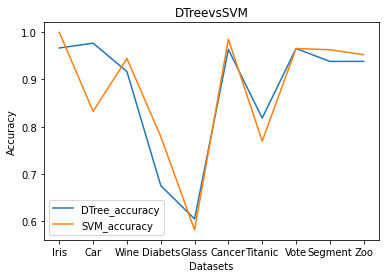

In [ ]:
dataset=['Iris', 'Car', 'Wine', 'Diabets', 'Glass','Cancer', 'Titanic','Vote', 'Segment', 'Zoo']
accuracyGraphic(dataset, tree_score, svm_score, "DTree", "SVM")

###**4. Utilice el método GridSearchCV para obtener los mejores híper-parámetros usando los siguientes valores:**###

###**Set the parameters by cross-validation parameters = [    {"kernel": ["rbf"], "gamma": [0.01, 0.1, 1.0], "C": [1, 10, 100, 1000]},    {"kernel": ["linear"], "C": [1, 10, 100, 1000]}, ] NOTAS: Compare el rendimiento de los resultados usando validación cruzada de híper-parámetros y los métodos usando valores fijos**###

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm
def hiperparametrosSVM(data_X, data_y):
  accuracy_svm=[]
  parameters = [ 
    {"kernel": ["rbf"], "gamma": [0.01, 0.1, 1.0], "C": [1, 10, 100, 1000]}, 
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]}, ]
  svm = SVC()
  grid = GridSearchCV(svm, parameters, cv=5, scoring='accuracy')
  grid_search = grid.fit(data_X, data_y)
  print('Mejores componentes principales: ', grid_search.best_params_)
  svm= SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'])
  return svm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm
parameters = [ 
    {"kernel": ["rbf"], "gamma": [0.01, 0.1, 1.0], "C": [1, 10, 100, 1000]}, 
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]}, ]
svm_grid= GridSearchCV(svm.SVC(), parameters, cv=5,scoring='accuracy')

In [ ]:
svm_cross_score= []

In [ ]:
irisgrid_svm = hiperparametrosSVM(iris_X, iris_y)
iris_svm_cross=cross_val(irisgrid_svm , iris_X, iris_y)
svm_cross_score.append(iris_svm_cross.mean())
svm_cross_score

Mejores componentes principales:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean score:  0.9733333333333334


[0.9733333333333334]

In [ ]:
cargrid_svm = hiperparametrosSVM(car_X, car_y)
car_svm_cross=cross_val(cargrid_svm , car_X, car_y)
svm_cross_score.append(car_svm_cross.mean())
svm_cross_score

Mejores componentes principales:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Mean score:  0.9288042747681141


[0.9733333333333334, 0.9288042747681141]

In [ ]:
winegrid_svm = hiperparametrosSVM(wine_X, wine_y)
wine_svm_cross=cross_val(winegrid_svm , wine_X, wine_y)
svm_cross_score.append(wine_svm_cross.mean())
svm_cross_score

Mejores componentes principales:  {'C': 1, 'kernel': 'linear'}
Mean score:  0.9555555555555555


[0.9733333333333334, 0.9288042747681141, 0.9555555555555555]

In [ ]:
diabetesgrid_svm = hiperparametrosSVM(diabetes_X, diabetes_y)
diabetes_svm_cross=cross_val(diabetesgrid_svm , diabetes_X, diabetes_y)
svm_cross_score.append(diabetes_svm_cross.mean())
svm_cross_score

Mejores componentes principales:  {'C': 100, 'kernel': 'linear'}
Mean score:  0.7578263841421736


[0.9733333333333334,
 0.9288042747681141,
 0.9555555555555555,
 0.7578263841421736]

In [ ]:
glassgrid_svm = hiperparametrosSVM(glass_X, glass_y)
glass_svm_cross=cross_val(glassgrid_svm , glass_X, glass_y)
svm_cross_score.append(glass_svm_cross.mean())
svm_cross_score

Mejores componentes principales:  {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
Mean score:  0.44437229437229436


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0.9733333333333334,
 0.9288042747681141,
 0.9555555555555555,
 0.7578263841421736,
 0.44437229437229436]

In [ ]:
cancergrid_svm = hiperparametrosSVM(cancer_X, cancer_y)
cancer_svm_cross=cross_val(cancergrid_svm , cancer_X, cancer_y)
svm_cross_score.append(cancer_svm_cross.mean())
svm_cross_score

Mejores componentes principales:  {'C': 1, 'kernel': 'linear'}
Mean score:  0.9664109121909632


[0.9733333333333334,
 0.9288042747681141,
 0.9555555555555555,
 0.7578263841421736,
 0.44437229437229436,
 0.9664109121909632]

In [ ]:
titanicgrid_svm = hiperparametrosSVM(titanic_X, titanic_y)
titanic_svm_cross=cross_val(titanicgrid_svm , titanic_X, titanic_y)
svm_cross_score.append(titanic_svm_cross.mean())
svm_cross_score

Mejores componentes principales:  {'C': 1000, 'kernel': 'linear'}
Mean score:  0.78716744913928


[0.9733333333333334,
 0.9288042747681141,
 0.9555555555555555,
 0.7578263841421736,
 0.44437229437229436,
 0.9664109121909632,
 0.78716744913928]

In [ ]:
votegrid_svm = hiperparametrosSVM(vote_X, vote_y)
vote_svm_cross=cross_val(votegrid_svm , vote_X, vote_y)
svm_cross_score.append(vote_svm_cross.mean())
svm_cross_score

Mejores componentes principales:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mean score:  0.9469873150105709


[0.9733333333333334,
 0.9288042747681141,
 0.9555555555555555,
 0.7578263841421736,
 0.44437229437229436,
 0.9664109121909632,
 0.78716744913928,
 0.9469873150105709]

In [ ]:
segmentgrid_svm = hiperparametrosSVM(segment_X, segment_y)
segment_svm_cross=cross_val(segmentgrid_svm ,segment_X,segment_y)
svm_cross_score.append(segment_svm_cross.mean())
svm_cross_score

Mejores componentes principales:  {'C': 100, 'kernel': 'linear'}
Mean score:  0.9543209876543208


[0.9733333333333334,
 0.9288042747681141,
 0.9555555555555555,
 0.7578263841421736,
 0.44437229437229436,
 0.9664109121909632,
 0.78716744913928,
 0.9469873150105709,
 0.9543209876543208]

In [ ]:
zoogrid_svm = hiperparametrosSVM(zoo_X, zoo_y)
zoo_svm_cross=cross_val(zoogrid_svm , zoo_X,zoo_y)
svm_cross_score.append(zoo_svm_cross.mean())
svm_cross_score

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Mejores componentes principales:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Mean score:  0.96


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


[0.9733333333333334,
 0.9288042747681141,
 0.9555555555555555,
 0.7578263841421736,
 0.44437229437229436,
 0.9664109121909632,
 0.78716744913928,
 0.9469873150105709,
 0.9543209876543208,
 0.96]

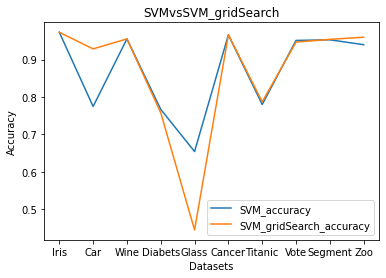

In [ ]:
dataset=['Iris', 'Car', 'Wine', 'Diabets', 'Glass','Cancer', 'Titanic','Vote', 'Segment', 'Zoo']
accuracyGraphic(dataset, svm_cross, svm_cross_score, "SVM", "SVM_gridSearch")

La validación cruzada de hiperparámetros se realiza cuando se quiere seleccionar los mejores hiperparámetros para un modelo dado. Es una técnica utilizada para evaluar el rendimiento del modelo con diferentes combinaciones de hiperparámetros, con el objetivo de encontrar la combinación óptima que maximice el rendimiento del modelo.

Se suele realizar después de elegir el modelo, y antes de entrenarlo con el conjunto de entrenamiento completo y evaluarlo con el conjunto de pruebas. Es una forma de asegurar que el modelo seleccionado es el más adecuado para el conjunto de datos y que se establecen los mejores hiperparámetros posibles.

Además, es especialmente útil cuando el modelo tiene muchos hiperparámetros y es difícil saber cuáles son los mejores valores para estos parámetros. La validación cruzada de hiperparámetros permite automatizar este proceso de selección de hiperparámetros y ahorra tiempo y esfuerzo.

uí hay un ejemplo de código que utiliza la validación cruzada de hiperparámetros en Python con scikit-learn para seleccionar los mejores hiperparámetros para un modelo de clasificación de árboles de decisión:

GRIDSEARCHCV
Hacer gráfico de los resultados dados

COMPARACIÓN DEL PUNTO 3 Y EL PUNTO 4